In [47]:
import numpy as np
import time
import networkx as nx
import matplotlib.pyplot as plt
import random

### Graph generation

In [81]:
n = 100
m = 500
mat = np.zeros((n, n), dtype=int)
c = 0
while c < m:
    i = np.random.randint(n)
    j = np.random.randint(n)
    if (mat[i, j] == 0) and (i != j):
        w = np.random.randint(1, 101)
        mat[i, j] = w
        mat[j, i] = w
        c += 1

G = nx.from_numpy_matrix(mat)

### Dijkstra and Bellman-Ford methods

In [102]:
source = np.random.randint(n)
avg_time = 0.0
avg_time1 = 0.0
for i in range(10):
    start = time.time()
    res = nx.single_source_dijkstra(G, source=source, weight='weight')
    stop = time.time()
    avg_time += stop - start

    start = time.time()
    res1 = nx.single_source_bellman_ford(G, source, weight='weight')
    stop = time.time()
    avg_time1 += stop - start
    print(res[0] == res[0], res[1] == res1[1])

print("average time for 10 Dijkstra executions: ", avg_time / 10)
print("average time for 10 Bellman-Ford executions: ", avg_time1 / 10)

True True
True True
True True
True True
True True
True True
True True
True True
True True
True True
average time for 10 Dijkstra executions:  0.0005739450454711914
average time for 10 Bellman-Ford executions:  0.001544046401977539


### graph generation for A*

In [93]:
G1 = nx.grid_2d_graph(10, 20)
G1.add_edges_from(
    [((x, y), (x + 1, y + 1))
    for x in range(9)
    for y in range(19)]
    +
    [((x + 1, y), (x, y + 1))
    for x in range(9)
    for y in range(19)],
    weight=1)
c = 0
while c < 40:
    i = np.random.randint(10)
    j = np.random.randint(20)
    if G1.has_node((i, j)):
        G1.remove_node((i, j))
        c += 1

### A*

time exec for A*: 0.00011181831359863281
time exec for Dijkstra: 0.0004353523254394531
identical results for Dijkstra and A*:  True


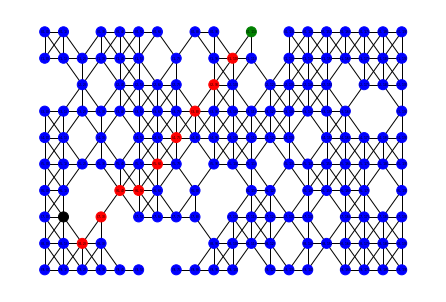

time exec for A*: 6.246566772460938e-05
time exec for Dijkstra: 0.00010037422180175781
identical results for Dijkstra and A*:  True


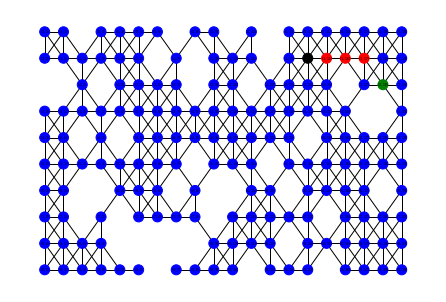

<Figure size 432x288 with 0 Axes>

time exec for A*: 9.512901306152344e-05
time exec for Dijkstra: 0.0004749298095703125
identical results for Dijkstra and A*:  True


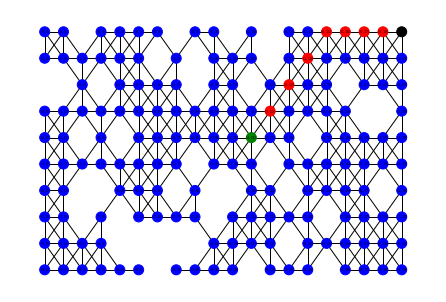

time exec for A*: 0.00010538101196289062
time exec for Dijkstra: 0.0002636909484863281
identical results for Dijkstra and A*:  True


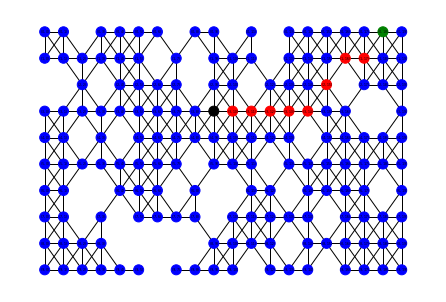

time exec for A*: 7.748603820800781e-05
time exec for Dijkstra: 0.00019693374633789062
identical results for Dijkstra and A*:  True


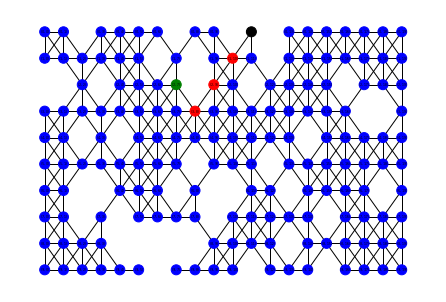

time exec for A*: 8.368492126464844e-05
time exec for Dijkstra: 0.0002231597900390625
identical results for Dijkstra and A*:  True


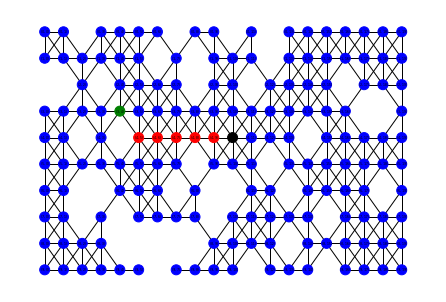

time exec for A*: 0.00016570091247558594
time exec for Dijkstra: 0.0004088878631591797
identical results for Dijkstra and A*:  True


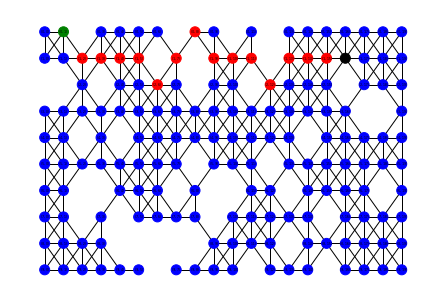

time exec for A*: 6.985664367675781e-05
time exec for Dijkstra: 0.00010657310485839844
identical results for Dijkstra and A*:  True


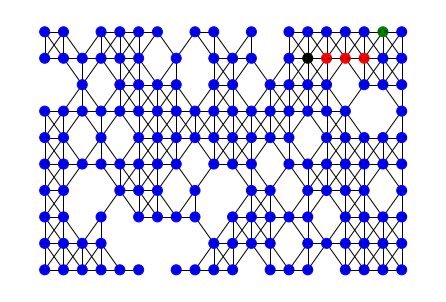

<Figure size 432x288 with 0 Axes>

In [104]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def colors(G1, source, target, res):
    color_map = []
    for node in G1:
        if node == source:
            color_map.append('green')
            continue
        if node == target:
            color_map.append("black")
            continue
        if node in res:
            color_map.append('red')
        else:
            color_map.append('blue')

    return color_map

pos = {(x,y):(y,-x) for x,y in G1.nodes()}
for i in range(6):
    source = random.choice(list(G1.nodes))
    target = random.choice(list(G1.nodes))
    start = time.time()
    res = nx.astar_path(G1, source, target, heuristic=dist)
    stop = time.time()
    print(f"time exec for A*: {stop - start}")

    start = time.time()
    res1 = nx.dijkstra_path(G1, source, target)
    stop = time.time()
    print(f"time exec for Dijkstra: {stop - start}")
    print("identical results for Dijkstra and A*: ", len(res) == len(res1))

    nx.draw(G1,
            pos,
            node_color=colors(G1, source, target, res),
            node_size=100,
            with_labels=True,
            font_size=3,
            width=1)
    plt.savefig("graph" + str(i) + ".png", dpi=1000)
    plt.show()
    plt.clf()